<a href="https://colab.research.google.com/github/nibelle/nibelle/blob/main/Project_2_Nibelle_Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2
## Visualizing the COVID-19 data for five countries in the world

By Nibelle Boudalia

June 20, 2021

**1. Introduction**
To start off, this project analyses some data from the Covid-19 pandemic on some countries of the world from February 2020 to the last 24 hours. The question that will be specifically analysed is if the total number of deaths in five countries of similar population size is related to the country's wealth and economic developement. To determine how wealthy the country is, we will be using the GDP per capita as well as the mean number of hospital beds per thousand available for each country throughout the whole pandemic.

In [ ]:
# Imports
import pandas as pd
import math
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

**2. Data pre-processing**
The data used in this project was taken from "Our World in Data" website, which can be found using the following link: https://ourworldindata.org/covid-deaths. The data chosen for this project is of quality since it contains so much interesting and detailed information of the progression of the pandemic for almost all the countries of the world. From the number of cases, tests, deaths, icu patients, vaccinated people to the population size, GDP per capita, number of hand washing facilities, this data describes almost everything about the Covid-19 outbreak. The dataframe has a total of 97126 rows and 60 columns which I believe is very powerful for a data science analysis.

In [ ]:
world_covid_df = pd.read_csv( "https://covid.ourworldindata.org/data/owid-covid-data.csv")
world_covid_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98634,ZWE,Africa,Zimbabwe,2021-06-23,43480.0,766.0,417.714,1692.0,1.0,7.429,2925.400,51.538,28.104,113.840,0.067,0.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5716.0,614408.0,41.338,0.385,3785.0,0.255,0.110,9.1,tests performed,1166849.0,715056.0,451793.0,20471.0,6568.0,7.85,4.81,3.04,442.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
98635,ZWE,Africa,Zimbabwe,2021-06-24,44306.0,826.0,482.714,1709.0,17.0,8.857,2980.974,55.575,32.478,114.984,1.144,0.596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4888.0,619296.0,41.667,0.329,3978.0,0.268,0.121,8.2,tests performed,1193315.0,725582.0,467733.0,26466.0,9604.0,8.03,4.88,3.15,646.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
98636,ZWE,Africa,Zimbabwe,2021-06-25,45217.0,911.0,554.571,1721.0,12.0,9.286,3042.268,61.293,37.312,115.791,0.807,0.625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0

**2.1**
Here I am loading only seven columns to have a better idea of what I can work with regarding the question of this project. It is important to note that I will not be using the "handwashing facilities" colum since there is no data available for four out of the five countries that I chose to analyse. It would have been an interesting colum to use for the purpose of the question and as an indicator of the economic development of each specific country, but I though it was more important to choose five countries that have a similar population size to create a better comparison. The column for the population will also not be explicitely used but it is relevent to have since we are taking five countries of similar population size.

In [ ]:
# Load all the data.
world_covid_df = pd.read_csv(
  "https://covid.ourworldindata.org/data/owid-covid-data.csv",
  usecols=[
  "location",
  "date",
  "handwashing_facilities",
  "hospital_beds_per_thousand",
  "total_deaths",
  "population",
  "gdp_per_capita",
  ]
)
world_covid_df

,location,date,total_deaths,population,gdp_per_capita,handwashing_facilities,hospital_beds_per_thousand
0,Afghanistan,2020-02-24,NaN,38928341.0,1803.987,37.746,0.5
1,Afghanistan,2020-02-25,NaN,38928341.0,1803.987,37.746,0.5
2,Afghanistan,2020-02-26,NaN,38928341.0,1803.987,37.746,0.5
3,Afghanistan,2020-02-27,NaN,38928341.0,1803.987,37.746,0.5
4,Afghanistan,2020-02-28,NaN,38928341.0,1803.987,37.746,0.5
...,...,...,...,...,...,...,...
98634,Zimbabwe,2021-06-23,1692.0,14862927.0,1899.775,36.791,1.7
98635,Zimbabwe,2021-06-24,1709.0,14862927.0,1899.775,36.791,1.7
98636,Zimbabwe,2021-06-25,1721.0,14862927.0,1899.775,36.791,1.7
98637,Zimbabwe,2021-06-26,1725.0,14862927.0,1899.775,36.791,1.7


In [ ]:
# Choosing the relevent columns for the first graph.
covid_df = world_covid_df.drop(["gdp_per_capita","population", "handwashing_facilities","hospital_beds_per_thousand"], axis =1)
covid_df

,location,date,total_deaths
0,Afghanistan,2020-02-24,NaN
1,Afghanistan,2020-02-25,NaN
2,Afghanistan,2020-02-26,NaN
3,Afghanistan,2020-02-27,NaN
4,Afghanistan,2020-02-28,NaN
...,...,...,...
98634,Zimbabwe,2021-06-23,1692.0
98635,Zimbabwe,2021-06-24,1709.0
98636,Zimbabwe,2021-06-25,1721.0
98637,Zimbabwe,2021-06-26,1725.0


In [ ]:
#Selecting the five countries that I will work with.
covid_df_by_country = covid_df.loc[(covid_df.location == "Algeria")| (covid_df.location == "Canada")| (covid_df.location == "Poland")| (covid_df.location == "Saudi Arabia")| (covid_df.location == "Malaysia")]
covid_df_by_country

,location,date,total_deaths
1480,Algeria,2020-02-25,NaN
1481,Algeria,2020-02-26,NaN
1482,Algeria,2020-02-27,NaN
1483,Algeria,2020-02-28,NaN
1484,Algeria,2020-02-29,NaN
...,...,...,...
77318,Saudi Arabia,2021-06-23,7716.0
77319,Saudi Arabia,2021-06-24,7730.0
77320,Saudi Arabia,2021-06-25,7743.0
77321,Saudi Arabia,2021-06-26,7760.0


Here, dates should be converted to datetime objects, but both techniques tried below didn't seem to work. There must be a mistake in the code or due to the syntax. Regardless, for that reason, on the next graph that will be presented, the dates on the x-axis won't be shown properly since they will overlapp. Although it would have been much preferable to have a clear view of the progression of the total number of deaths throughout the pandemic, for the purpose of this analysis, it will not be too disadvantegeous since the goal is to analyse which countries have had the most and least ammount of total deaths.

First method:

In [ ]:
# covid_df_by_country.index = pd.to_datetime(covid_df_by_country.index, format="%d-%m-%Y")
# covid_df_by_country.head(50)

Second method:

In [ ]:
# covid_df_by_country["date"] = pd.to_datetime(covid_df_by_country["date"], format="%d-%m-%Y")

In [ ]:
#Grouping the data by location and date
death_by_country = covid_df_by_country.groupby(["location","date"]).sum()
death_by_country

total_deaths
location     date                    
Algeria      2020-02-25           0.0
             2020-02-26           0.0
             2020-02-27           0.0
             2020-02-28           0.0
             2020-02-29           0.0
...                               ...
Saudi Arabia 2021-06-23        7716.0
             2021-06-24        7730.0
             2021-06-25        7743.0
             2021-06-26        7760.0
             2021-06-27        7775.0

[2492 rows x 1 columns]

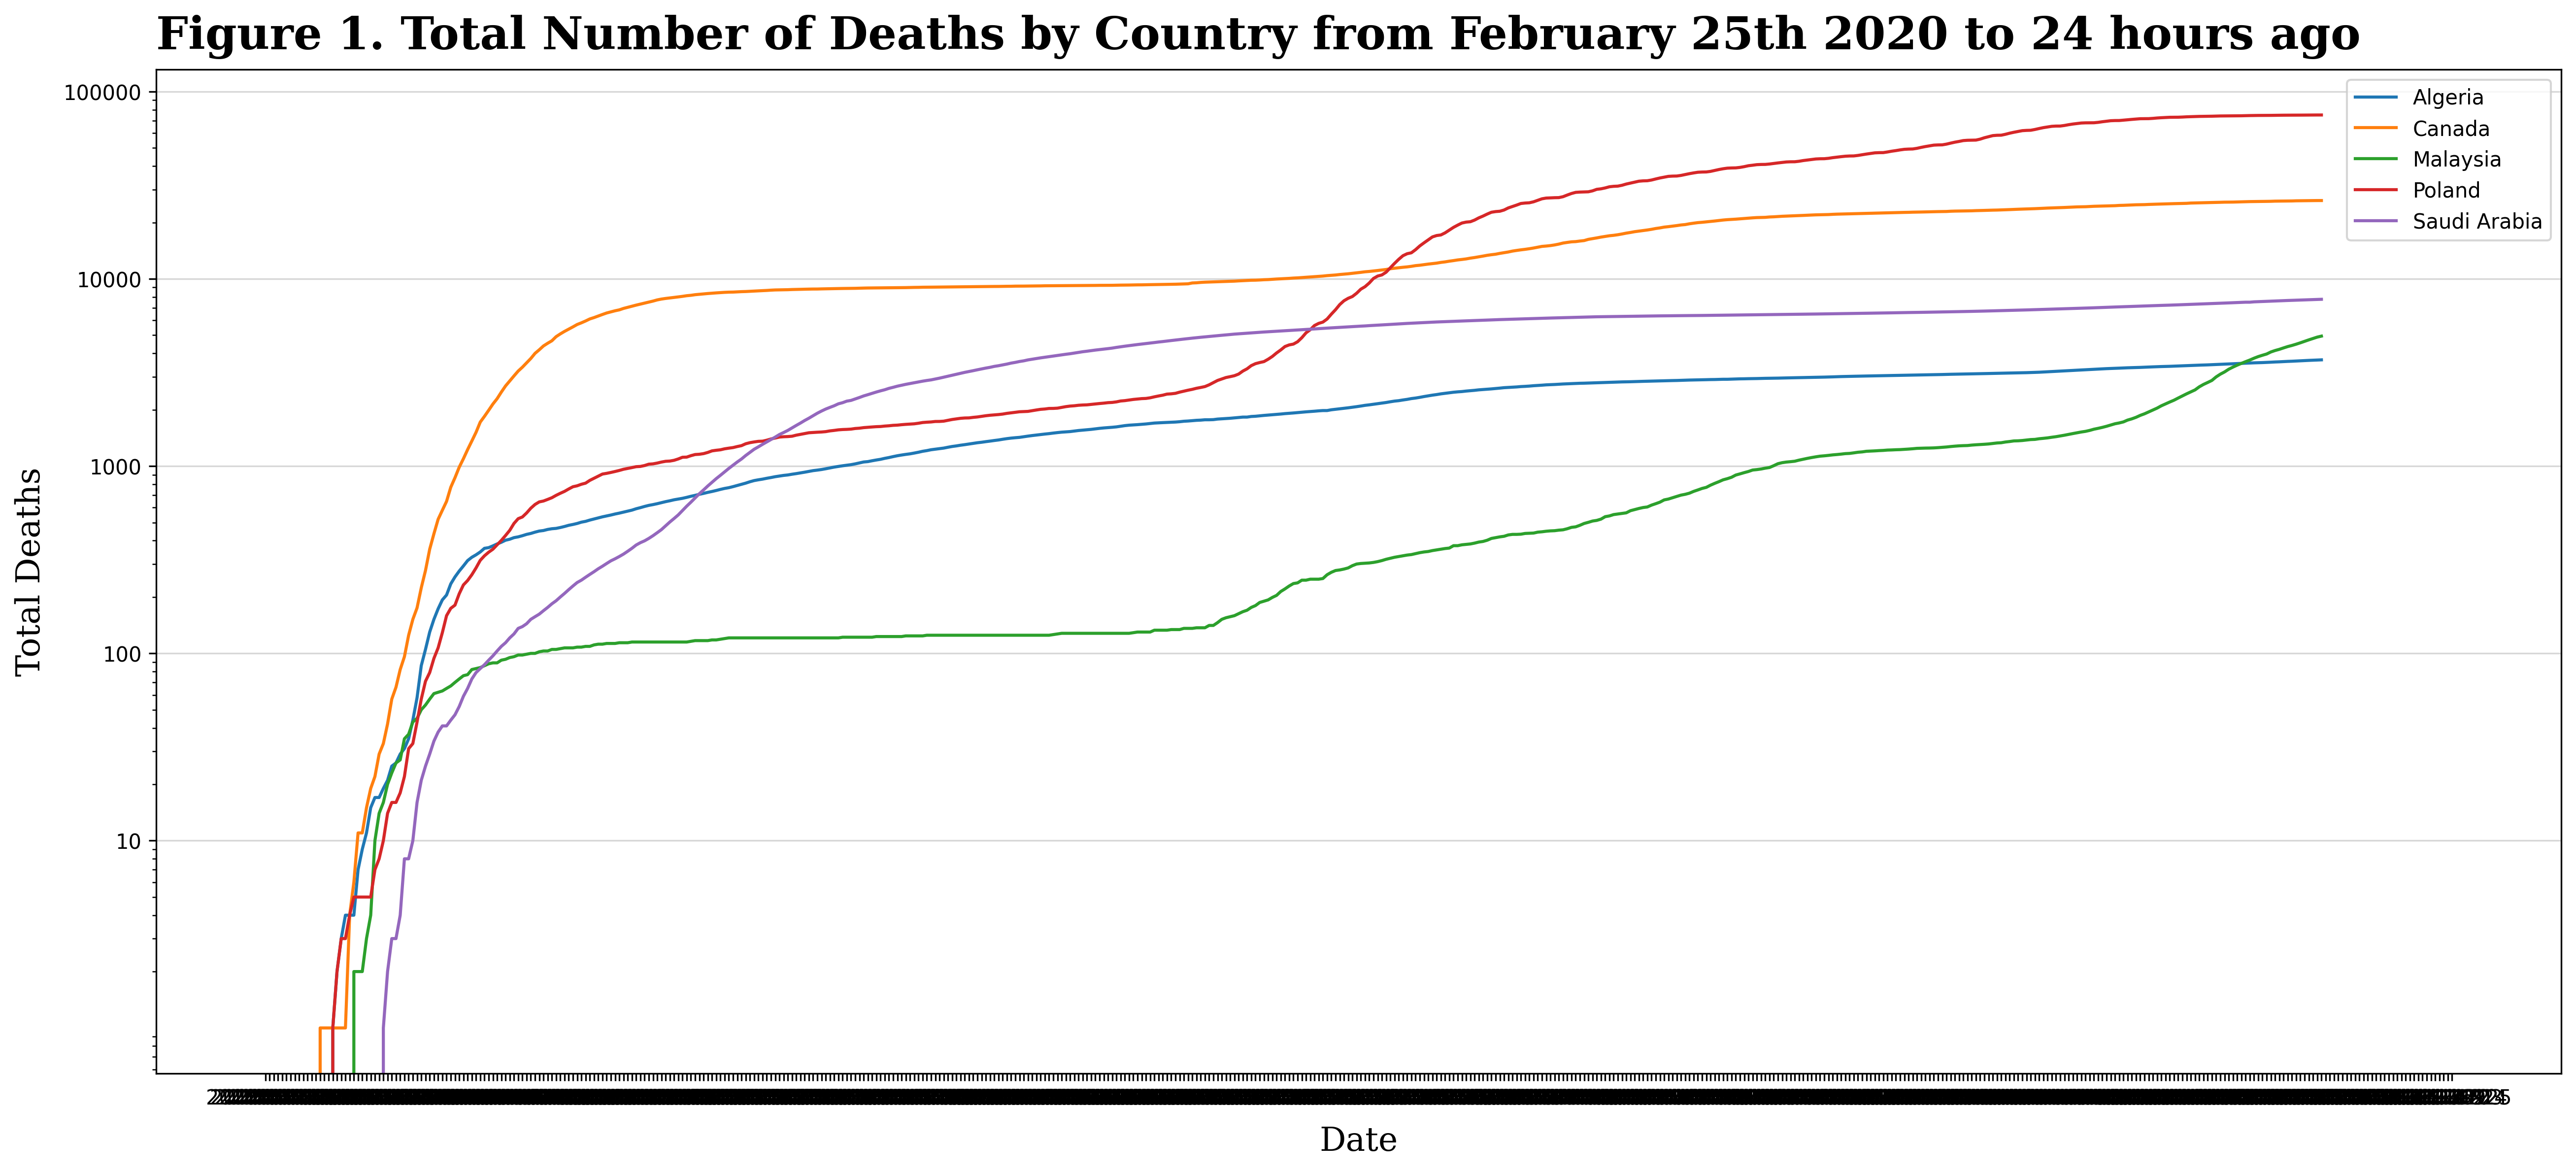

In [ ]:
#Plotting the first graph which Total Number of Deaths by Country from February 25th 2020 up to 24 hours ago.
title_font = {
    'family': 'serif',
    'color':  'black',
    'weight': 'bold',
    'size': 22,
}
label_font = {
    'family': 'serif',
    'color':  'xkcd:black',
    'weight': 'normal',
    'size': 16,
}
plt.figure(figsize=[21,9], dpi=300)
plt.title(
    "Figure 1. Total Number of Deaths by Country from February 25th 2020 to 24 hours ago",
    fontdict=title_font,
    loc='left',
    pad=10
)

names = death_by_country.index.get_level_values(level=0).unique()
for region in names:
  plt.plot(death_by_country.loc[region])

plt.xlabel(
    "Date",
    fontdict=label_font,
    labelpad=8
)
plt.ylabel(
    "Total Deaths",
    fontdict=label_font,
    labelpad=8
)
plt.grid(True, axis='y', alpha=0.5)
plt.yscale("log")

plt.yticks(
    ticks=[10, 100, 1000, 10000, 100000],
    labels=[10, 100, 1000, 10000, 100000]
)

plt.legend(names)
plt.show()

# **3. Analysis**


**3.1 Figure 1**
As we can see in this graph, for most of the duration of the pandemic, Malaysia seems to have had the least amount of total deaths, although it hardly surpasses Algeria towards the end. Then, comes Algeria, Saudi Arabia, Canada, which is the country with the most amount of total deaths for almost half of the duration of the pandemic and then, Poland surpasses it. It is important to note the colour used to identify each countries since the same colors will be used for the next figures to come.

In [ ]:
covid_df_by_country = world_covid_df.loc[(covid_df.location == "Algeria")| (covid_df.location == "Canada")| (covid_df.location == "Poland")| (covid_df.location == "Saudi Arabia")| (covid_df.location == "Malaysia")]
covid_df_by_country

,location,date,total_deaths,population,gdp_per_capita,handwashing_facilities,hospital_beds_per_thousand
1480,Algeria,2020-02-25,NaN,43851043.0,13913.839,83.741,1.9
1481,Algeria,2020-02-26,NaN,43851043.0,13913.839,83.741,1.9
1482,Algeria,2020-02-27,NaN,43851043.0,13913.839,83.741,1.9
1483,Algeria,2020-02-28,NaN,43851043.0,13913.839,83.741,1.9
1484,Algeria,2020-02-29,NaN,43851043.0,13913.839,83.741,1.9
...,...,...,...,...,...,...,...
77318,Saudi Arabia,2021-06-23,7716.0,34813867.0,49045.411,NaN,2.7
77319,Saudi Arabia,2021-06-24,7730.0,34813867.0,49045.411,NaN,2.7
77320,Saudi Arabia,2021-06-25,7743.0,34813867.0,49045.411,NaN,2.7
77321,Saudi Arabia,2021-06-26,7760.0,34813867.0,49045.411,NaN,2.7


In [ ]:
#Selecting the relevent columns to evaluate the gdp per capita.
gdp_per_capita = covid_df_by_country.drop(["total_deaths","population", "handwashing_facilities","hospital_beds_per_thousand"], axis =1)
gdp_per_capita

,location,date,gdp_per_capita
1480,Algeria,2020-02-25,13913.839
1481,Algeria,2020-02-26,13913.839
1482,Algeria,2020-02-27,13913.839
1483,Algeria,2020-02-28,13913.839
1484,Algeria,2020-02-29,13913.839
...,...,...,...
77318,Saudi Arabia,2021-06-23,49045.411
77319,Saudi Arabia,2021-06-24,49045.411
77320,Saudi Arabia,2021-06-25,49045.411
77321,Saudi Arabia,2021-06-26,49045.411


In [ ]:
mean_gdp_per_capita = gdp_per_capita.groupby("location").mean()
mean_gdp_per_capita

,gdp_per_capita
location,
Algeria,13913.839
Canada,44017.591
Malaysia,26808.164
Poland,27216.445
Saudi Arabia,49045.411


Information about the GDP per capita:
GDP stands for Gross Domestic Product. It calculates how much the country makes in total and divides it by the population size. It is often used by economists to determine the economic growth of the country. For that reason, it will be used to answer the question of this project which is to determine if the total number of deaths is related to the country's prosperity.

Source : https://www.investopedia.com/terms/p/per-capita-gdp.asp

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

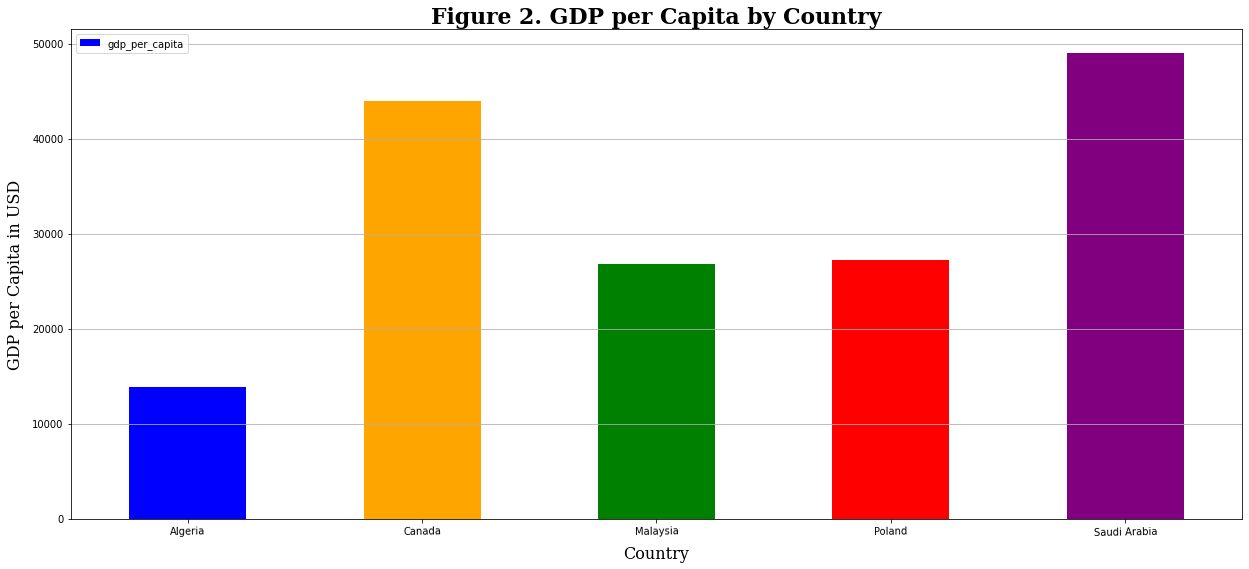

In [ ]:
#Plotting the second graph of the GDP per capita for each country.
title_font = {
    'family': 'serif',
    'color':  'black',
    'weight': 'bold',
    'size': 22,
}

label_font = {
    'family': 'serif',
    'color':  'xkcd:black',
    'weight': 'normal',
    'size': 16,
}

colors = [("blue","orange","green", "red","purple")]

mean_gdp_per_capita.plot(kind="bar",figsize=[21,9], color = colors)

plt.xlabel(
    "Country",
    fontdict=label_font,
    labelpad=8
)

plt.ylabel(
    "GDP per Capita in USD",
    fontdict=label_font,
    labelpad=8
)
plt.grid(axis='y')
plt.title("Figure 2. GDP per Capita by Country", fontdict=title_font,
    loc="center")
plt.xticks(rotation = 1)



**3.2 Figure 2**
As we can see, Saudi Arabia has the highest GDP per capita, then comes Canada, then Poland, then not too far after comes Malaysia and finally Algeria. If the country's wealth was related to the total number of deaths, we would have expected Saudi Arabia and Canada to have the least amount of total deaths since they would have been wealthy enough to put in place the necessary measures, regulations and  facilities to prevent the spread of the virus and decrease the chances of having people ending up at the hospital and dying. From figure 1 we know that they did not have the least amount of total deaths which is already a good indicator of what the answer to the question will be.

In [ ]:
hospital_beds = covid_df_by_country.drop(["total_deaths","population", "handwashing_facilities","gdp_per_capita"], axis =1)
hospital_beds

,location,date,hospital_beds_per_thousand
1480,Algeria,2020-02-25,1.9
1481,Algeria,2020-02-26,1.9
1482,Algeria,2020-02-27,1.9
1483,Algeria,2020-02-28,1.9
1484,Algeria,2020-02-29,1.9
...,...,...,...
77318,Saudi Arabia,2021-06-23,2.7
77319,Saudi Arabia,2021-06-24,2.7
77320,Saudi Arabia,2021-06-25,2.7
77321,Saudi Arabia,2021-06-26,2.7


In [ ]:
mean_hospital_beds = hospital_beds.groupby("location").mean()
mean_hospital_beds

,hospital_beds_per_thousand
location,
Algeria,1.90
Canada,2.50
Malaysia,1.90
Poland,6.62
Saudi Arabia,2.70


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

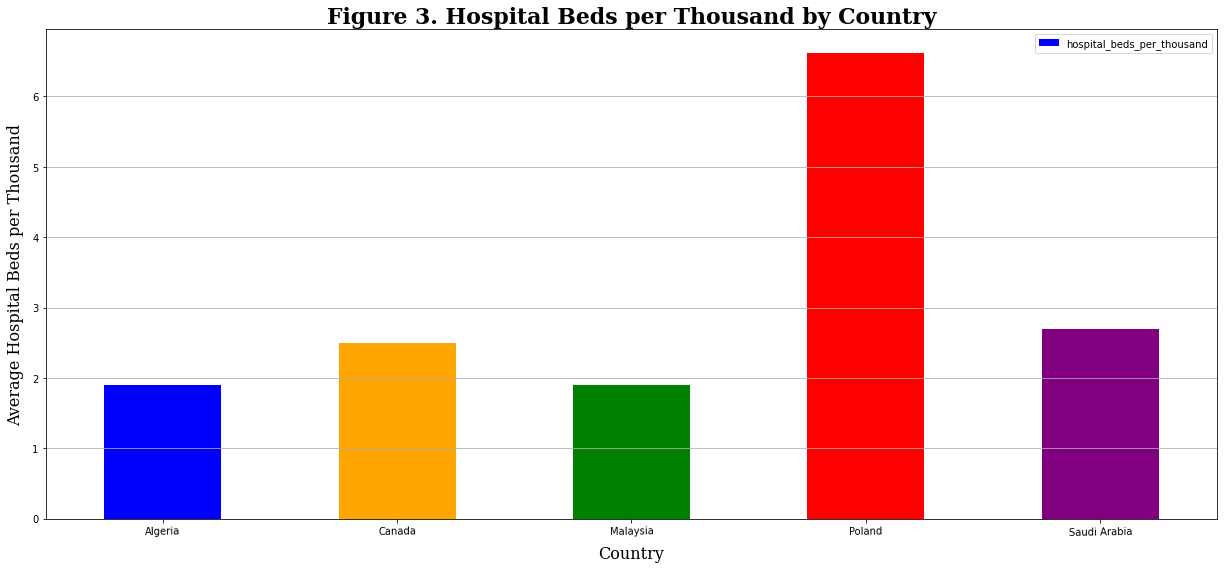

In [ ]:
#Plotting the third graph of the average hospital beds per thousand for each counry
title_font = {
    'family': 'serif',
    'color':  'black',
    'weight': 'bold',
    'size': 22,
}

label_font = {
    'family': 'serif',
    'color':  'xkcd:black',
    'weight': 'normal',
    'size': 16,
}

colors = [("blue","orange","green", "red","purple")]

mean_hospital_beds.plot(kind="bar",figsize=[21,9], color = colors)

plt.xlabel(
    "Country",
    fontdict=label_font,
    labelpad=8
)

plt.ylabel(
    "Average Hospital Beds per Thousand",
    fontdict=label_font,
    labelpad=8
)
plt.grid(axis='y')
plt.title("Figure 3. Hospital Beds per Thousand by Country", fontdict=title_font,
    loc="center")
plt.xticks(rotation = 1)


**3.3 Figure 3**
Except for Poland, this graph of the average hospital beds per thousand follows almost the same patern as the GDP per capita graph. After Poland comes Saudia Arabia, Canada and then, Malaysia and Algeria. Throughout the pandemic, we often heard that one of the main goal of the governments was always to make sure that the number of cases would never be too high until it surpasses the capacity hospitals had. Indeed, the number of hospital beds available during the Covid-19 pandemic is related to the number of patients that have serious symptoms and that require serious health care. If there are not enough hospital beds for the number of seriously sick patients, there will most likely be an increase in the total number of deaths in that country. Obviously, the number of hospital beds and health care facilities available is related to the country's economic development, since the country will be more able to invest in them. I believe it is the reason why this graph follows a very similar pattern as the graph from figure 2 on the GDP per capita.

**4. Conclusion**
Saudi Arabia, Canada and Poland all come in the top three countries that are the most economically developped, since they are the three countries with the highest GDP per capita and the highest number of hospital beds per thousand. Algeria and Malaysia are the countries with the lowest GDP per capita and number of hospital beds per thousand. However, these two countries are also the ones with the least amount of total deaths compared to the other three countries that are more wealthy. Now, considering that all five countries have almost the same population size, with Algeria having a little more population, and Malaysia having a little less population than the three other countries, the total number of deaths does not have to do with population size in the case of this analysis for these five countries chosen. Finally, to answer the question of this project, the wealth and economic development of a country is not necessarly related to the total number of deaths. There are probably other factors that are related to the total number of deaths, but wealth and economic development is not one of them.